In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def load_dataset(path):
    """Load dataset and keep only numeric columns."""
    df = pd.read_csv(path)
    df_numeric = df.select_dtypes(include=[np.number])  # keep only numeric columns
    return df_numeric  # return DataFrame, not values

In [3]:
def summarize_dataset(name, df):
    """Print dataset summary for debugging."""
    print(f"\nDataset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Missing values per column:\n{df.isnull().sum()}")
    print("Basic stats:")
    print(df.describe().T[["min","max","mean","std"]].head())

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def compute_reconstruction_error(X, n_components_list):
    """Compute reconstruction errors using PCA."""
    # Step 1: clean NaNs/Infs
    X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

    # Step 2: standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # max components possible
    max_components = min(X_scaled.shape)

    errors = []
    valid_components = []

    for n in n_components_list:
        if n > max_components:
            continue  # skip if too many components

        # PCA
        pca = PCA(n_components=n)
        X_proj = pca.fit_transform(X_scaled)
        X_recon = pca.inverse_transform(X_proj)

        # Reconstruction error
        error = np.sum((X_scaled - X_recon) ** 2)
        errors.append(error)
        valid_components.append(n)

    return valid_components, errors


In [5]:
def plot_errors(dataset_name, n_list, errors, save=False):
    """Plot and optionally save reconstruction error curve."""
    plt.figure(figsize=(7,5))
    plt.plot(n_list, errors, marker='o')
    plt.title(f"Reconstruction Error vs Eigenvectors ({dataset_name})")
    plt.xlabel("Number of Eigenvectors")
    plt.ylabel("Reconstruction Error")
    plt.grid(True)
    if save:
        plt.savefig(f"{dataset_name}_reconstruction_error.png", dpi=150, bbox_inches='tight')
    plt.show()

In [6]:
datasets = {
    "Advertising": "advertising.csv",
    "Housing": "Housing.csv",
    "FAA_AI": "faa_ai_prelim.csv"
}

In [7]:
n_components_list = [1, 2, 3, 5, 7, 10, 15]


Dataset: Advertising
Shape: (200, 4)
Missing values per column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Basic stats:
           min    max      mean        std
TV         0.7  296.4  147.0425  85.854236
Radio      0.0   49.6   23.2640  14.846809
Newspaper  0.3  114.0   30.5540  21.778621
Sales      1.6   27.0   15.1305   5.283892

Reconstruction Errors for Advertising:
  Eigenvectors=1, Reconstruction Error=389.99
  Eigenvectors=2, Reconstruction Error=141.21
  Eigenvectors=3, Reconstruction Error=10.15


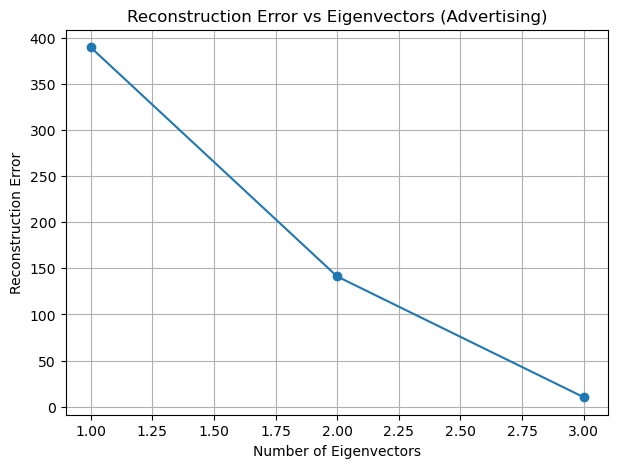


Dataset: Housing
Shape: (545, 6)
Missing values per column:
price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64
Basic stats:
                 min         max          mean           std
price      1750000.0  13300000.0  4.766729e+06  1.870440e+06
area          1650.0     16200.0  5.150541e+03  2.170141e+03
bedrooms         1.0         6.0  2.965138e+00  7.380639e-01
bathrooms        1.0         4.0  1.286239e+00  5.024696e-01
stories          1.0         4.0  1.805505e+00  8.674925e-01

Reconstruction Errors for Housing:
  Eigenvectors=1, Reconstruction Error=1876.92
  Eigenvectors=2, Reconstruction Error=1213.58
  Eigenvectors=3, Reconstruction Error=844.53
  Eigenvectors=5, Reconstruction Error=164.64


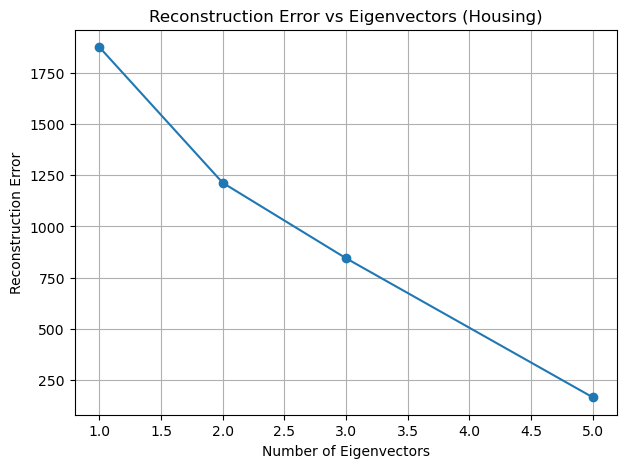


Dataset: FAA_AI
Shape: (83, 22)
Missing values per column:
ACFT_MISSING_FLAG      83
FAR_PART               82
FLT_CRW_INJ_NONE       19
FLT_CRW_INJ_MINOR      77
FLT_CRW_INJ_SERIOUS    82
FLT_CRW_INJ_FATAL      75
FLT_CRW_INJ_UNK        83
CBN_CRW_INJ_NONE       83
CBN_CRW_INJ_MINOR      83
CBN_CRW_INJ_SERIOUS    83
CBN_CRW_INJ_FATAL      83
CBN_CRW_INJ_UNK        82
PAX_INJ_NONE           66
PAX_INJ_MINOR          82
PAX_INJ_SERIOUS        80
PAX_INJ_FATAL          82
PAX_INJ_UNK            83
GRND_INJ_NONE          83
GRND_INJ_MINOR         83
GRND_INJ_SERIOUS       83
GRND_INJ_FATAL         83
GRND_INJ_UNK           82
dtype: int64
Basic stats:
                      min   max       mean       std
ACFT_MISSING_FLAG     NaN   NaN        NaN       NaN
FAR_PART             91.0  91.0  91.000000       NaN
FLT_CRW_INJ_NONE      1.0   6.0   1.218750  0.700765
FLT_CRW_INJ_MINOR     1.0   2.0   1.333333  0.516398
FLT_CRW_INJ_SERIOUS   3.0   3.0   3.000000       NaN

Reconstruction Errors f

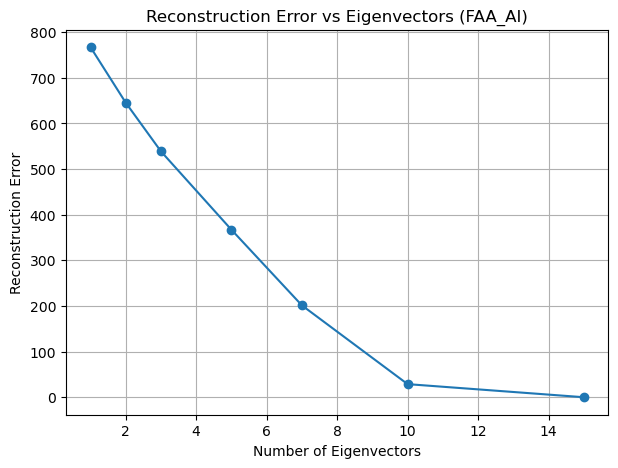

In [8]:
for name, path in datasets.items():
    # Load as DataFrame
    df = load_dataset(path)
    summarize_dataset(name, df)

    # Compute errors
    n_list, errors = compute_reconstruction_error(df.values, n_components_list)

    # Print results
    print(f"\nReconstruction Errors for {name}:")
    for n, err in zip(n_list, errors):
        print(f"  Eigenvectors={n}, Reconstruction Error={err:.2f}")

    # Plot
    plot_errors(name, n_list, errors, save=True)
